An organization wants to predict who possible defaulters are for the consumer loans product. They have data about historic customer behavior based on what they have observed. Hence when they acquire new customers they want to predict who is riskier and who is not.

## Import Section

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from scipy.stats import norm
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## Loading Data

In [3]:
df=pd.read_csv("C:/Users/USER/Downloads/Training Data.csv",index_col=0)

In [4]:
df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Id,,,,,,,,,,,,
1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [5]:
print(df.shape)

(252000, 12)


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252000 entries, 1 to 252000
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Income             252000 non-null  int64 
 1   Age                252000 non-null  int64 
 2   Experience         252000 non-null  int64 
 3   Married/Single     252000 non-null  object
 4   House_Ownership    252000 non-null  object
 5   Car_Ownership      252000 non-null  object
 6   Profession         252000 non-null  object
 7   CITY               252000 non-null  object
 8   STATE              252000 non-null  object
 9   CURRENT_JOB_YRS    252000 non-null  int64 
 10  CURRENT_HOUSE_YRS  252000 non-null  int64 
 11  Risk_Flag          252000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 25.0+ MB
None


### Checking for Null Values

In [7]:
print(df.isnull().sum())

Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64


In [8]:
print(df.nunique())

Income               41920
Age                     59
Experience              21
Married/Single           2
House_Ownership          3
Car_Ownership            2
Profession              51
CITY                   317
STATE                   29
CURRENT_JOB_YRS         15
CURRENT_HOUSE_YRS        5
Risk_Flag                2
dtype: int64


In [9]:
df.describe()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [10]:
df.describe(include='O')

,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE
count,252000,252000,252000,252000,252000,252000
unique,2,3,2,51,317,29
top,single,rented,no,Physician,Vijayanagaram,Uttar_Pradesh
freq,226272,231898,176000,5957,1259,28400


### Checking for Outliers

In [11]:
categorical_cols = [col for col in df.columns if df[col].dtype in ['object']]
numerical_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]

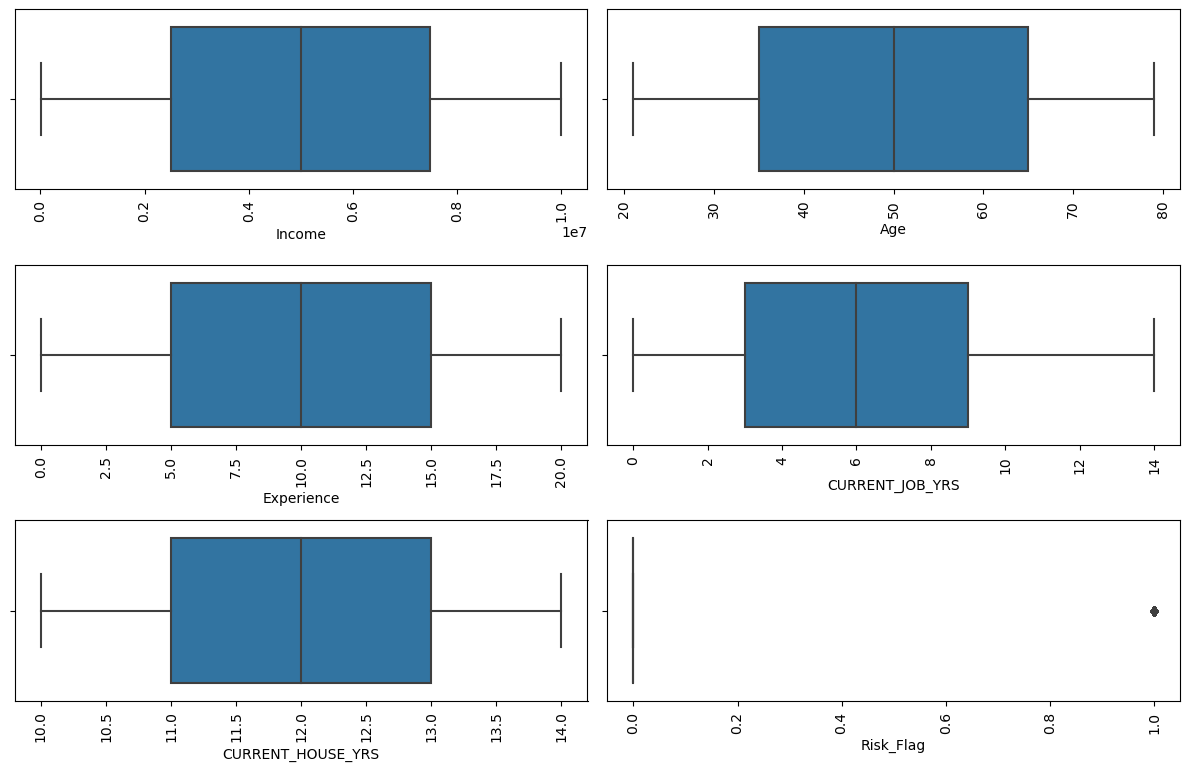

In [12]:
#boxplot for numerical variables
fig=plt.figure(figsize=(12, 20))
for idx, column in enumerate(numerical_cols):
    plt.subplot(8,2,idx+1)
    sns.boxplot(x=df[column],data=df)    
    plt.xticks(rotation=90)
    plt.tight_layout()

#### There is neither any null value nor any outlier present in the dataset.

# Exploratory Data Analysis

In [13]:
defaulted=df.Risk_Flag.sum()
print(defaulted)

30996


In [14]:
len(df.Risk_Flag)

252000

#### There are 30996 defaulters out of 252000.

Text(0.5, 1.0, 'Risk Flag')

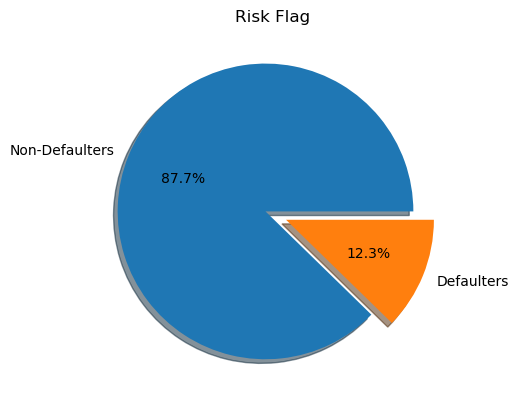

In [15]:
r=df.groupby('Risk_Flag')['Risk_Flag'].count()
a=plt.pie(r, explode=[0.05, 0.1], labels=['Non-Defaulters', 'Defaulters'], radius=1.0, autopct='%1.1f%%',  shadow=True);
plt.title('Risk Flag')

#### There are 12.3% Defaulters in Our dataset.

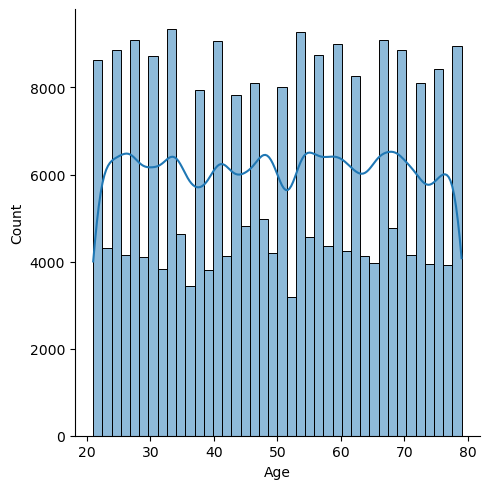

In [16]:
sns.displot(df["Age"],bins=40,kde=True);

#### H0: There is no association between the variables; they are independent.

#### H1: There is an association between the variables; they are dependent.

In [17]:
def chi_square_test(data):
    stat, p, dof, expected = chi2_contingency(data)
    alpha = 0.05
    print("p value is " + str(p))
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (H0 holds true)')

In [18]:
df.rename(columns = {"Married/Single" : "Marital_status"},inplace=True)
marital_status_risk_flag = pd.crosstab(df["Marital_status"], df["Risk_Flag"])
marital_status_risk_flag

Risk_Flag,0,1
Marital_status,,
married,23092,2636
single,197912,28360


In [19]:
chi_square_test(marital_status_risk_flag)

p value is 3.773053705715196e-26
Dependent (reject H0)


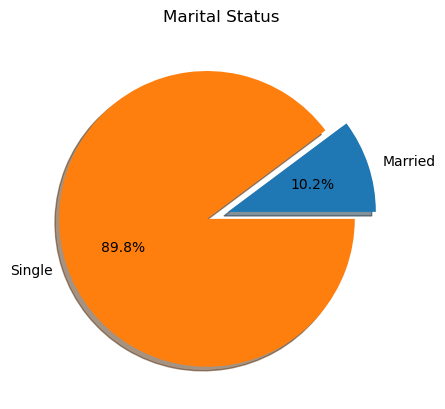

<Figure size 100x100 with 0 Axes>

In [20]:
r=df.groupby('Marital_status')['Marital_status'].count()
a=plt.pie(r, explode=[0.05, 0.1], labels=['Married', 'Single'], radius=1.0, autopct='%1.1f%%',  shadow=True);
plt.title('Marital Status')
plt.figure(figsize=(1,1))
plt.show()

Text(0.5, 1.0, 'Paid and Default based on Marital Status')

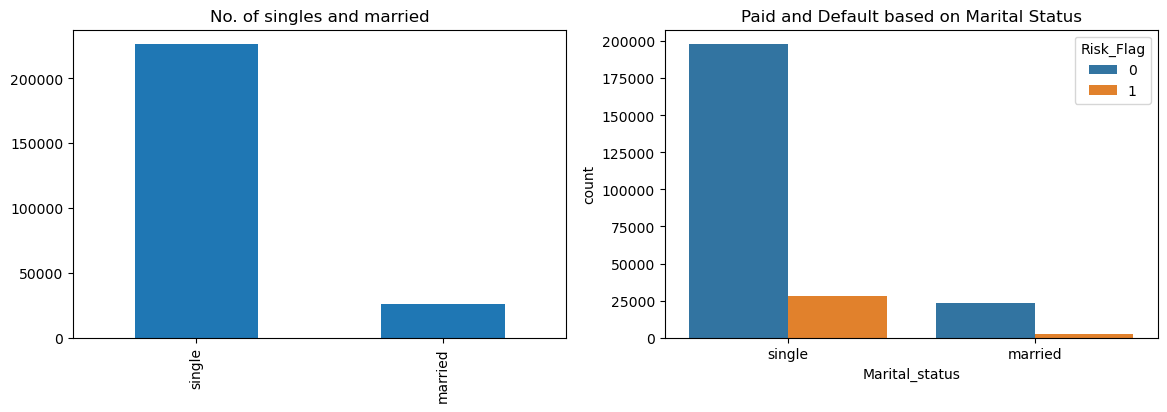

In [21]:
f, ax = plt.subplots(1,2,figsize=(14,4))

df.Marital_status.value_counts().plot.bar(ax=ax[0]).set(title = "No. of singles and married")

sns.countplot(data=df,x='Marital_status', hue='Risk_Flag', ax=ax[1])
ax[1].set_title("Paid and Default based on Marital Status")

In [22]:
married_default_rate = 2636 / 25728 
single_default_rate = 28360 / 226272

Single=df['Marital_status'].value_counts()['single']
Married=df['Marital_status'].value_counts()['married']

print("Single: ",Single)
print("Married: ",Married)

print(f"{round(married_default_rate * 100,2)}% Married People are default-on-loan\n"f"{round(single_default_rate * 100,2)}% Single People are default-on-loan")

Single:  226272
Married:  25728
10.25% Married People are default-on-loan
12.53% Single People are default-on-loan


#### Single Persons are more loan takers and they are more defaulters.

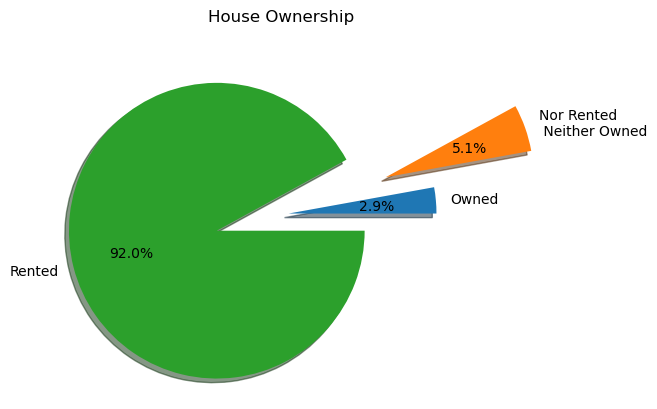

In [23]:
r=df.groupby('House_Ownership')['House_Ownership'].count()
a=plt.pie(r, explode=[0.05, 0.75,0.45], labels=['Owned', 'Nor Rented \n Neither Owned','Rented'], radius=1.0, autopct='%1.1f%%',  shadow=True);
plt.title('House Ownership')
plt.show()

In [24]:
house_ownership_risk_flag = pd.crosstab(df["House_Ownership"], df["Risk_Flag"])
house_ownership_risk_flag

Risk_Flag,0,1
House_Ownership,,
norent_noown,6469,715
owned,11758,1160
rented,202777,29121


In [25]:
chi_square_test(house_ownership_risk_flag)

p value is 1.8381930028370595e-40
Dependent (reject H0)


Text(0.5, 1.0, 'Paid and Default based on House Ownership')

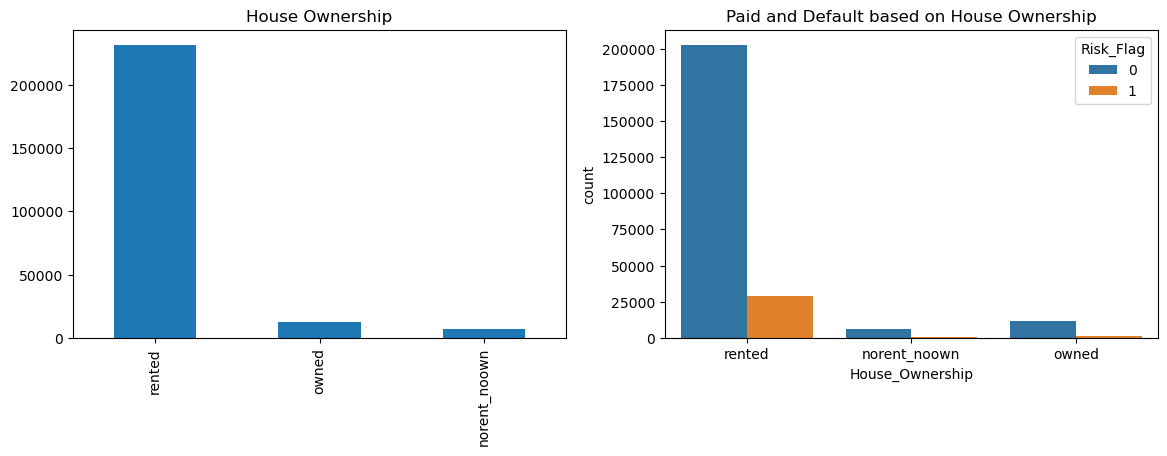

In [26]:
f, ax = plt.subplots(1,2,figsize=(14,4))
df.House_Ownership.value_counts().plot.bar(ax=ax[0]).set(title = "House Ownership")
sns.countplot(data=df,x='House_Ownership', hue='Risk_Flag', ax=ax[1])
ax[1].set_title("Paid and Default based on House Ownership")

In [27]:
norent_noown_default_rate = 715 / 7184
owned_default_rate = 1160 / 12918
rented_default_rate = 29121 / 231898

norent_noown=df['House_Ownership'].value_counts()['norent_noown']
owned=df['House_Ownership'].value_counts()['owned']
rented=df['House_Ownership'].value_counts()['rented']

print("Not Rented Not Owned: ",norent_noown)
print("Owned: ",owned)
print("Rented:",rented)

print(f"\n{round(norent_noown_default_rate * 100,2)}% Not Rented Not Owned are default-on-loan\n"f"{round(owned_default_rate * 100,2)}% Owned People are default-on-loan\n"f"{round(rented_default_rate * 100,2)}% Rented are default-on-loan")

Not Rented Not Owned:  7184
Owned:  12918
Rented: 231898

9.95% Not Rented Not Owned are default-on-loan
8.98% Owned People are default-on-loan
12.56% Rented are default-on-loan


#### Based on above observations we can say that people who lives on Rented House are highest loan takers and are highest defaulters also

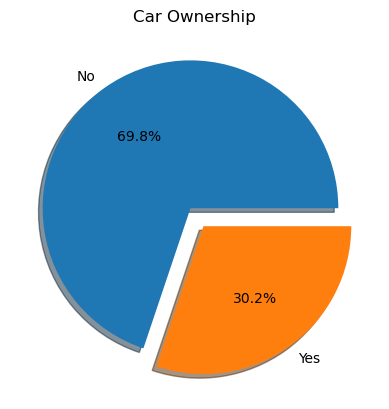

In [28]:
q=df.groupby('Car_Ownership')['Car_Ownership'].count()
plt.pie(q, explode=[0.05, 0.1], labels=['No','Yes'], radius=1.0, autopct='%1.1f%%',shadow=True);
plt.title('Car Ownership')
plt.show()

In [29]:
car_ownership_risk_flag = pd.crosstab(df["Car_Ownership"], df["Risk_Flag"])
car_ownership_risk_flag

Risk_Flag,0,1
Car_Ownership,,
no,153439,22561
yes,67565,8435


In [30]:
chi_square_test(car_ownership_risk_flag)

p value is 1.7350853850183746e-33
Dependent (reject H0)


Text(0.5, 1.0, 'Paid and Default based on Car Ownership')

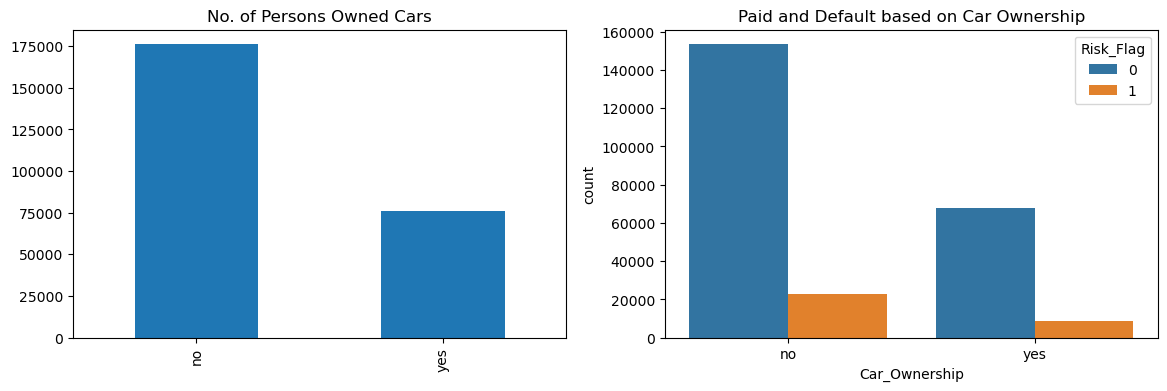

In [31]:
f, ax = plt.subplots(1,2,figsize=(14,4))
df.Car_Ownership.value_counts().plot.bar(ax=ax[0]).set(title = "No. of Persons Owned Cars")
sns.countplot(data=df,x='Car_Ownership', hue='Risk_Flag', ax=ax[1])
ax[1].set_title("Paid and Default based on Car Ownership")

In [32]:
no_default_rate = 22561 / 176000 
yes_default_rate = 8435 / 76000

No=df['Car_Ownership'].value_counts()['no']
Yes=df['Car_Ownership'].value_counts()['yes']

print("No: ",No)
print("Yes: ",Yes)

print(f"\n{round(no_default_rate * 100,2)}% People not own cars are default-on-loan\n"f"{round(yes_default_rate * 100,2)}% People own cars are default-on-loan")

No:  176000
Yes:  76000

12.82% People not own cars are default-on-loan
11.1% People own cars are default-on-loan


#### Based on above observations we can say that people who not own Cars are highest loan takers and are highest defaulters also

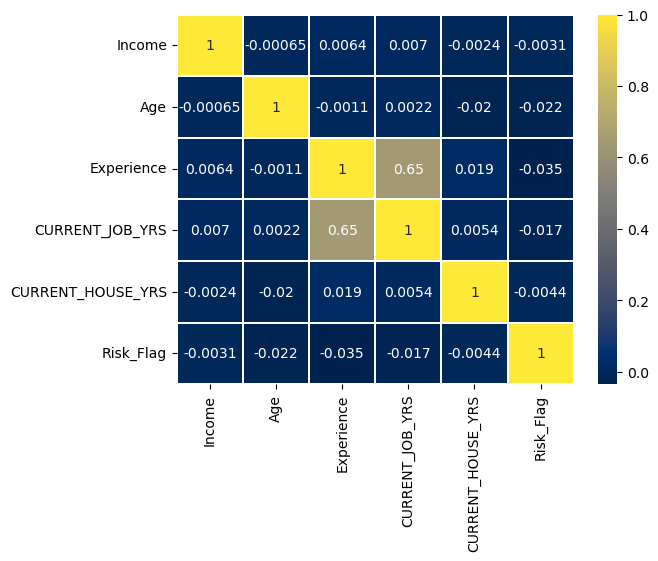

In [109]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="cividis", linewidths=0.2);

#### Current job years and Experience are highly correlated

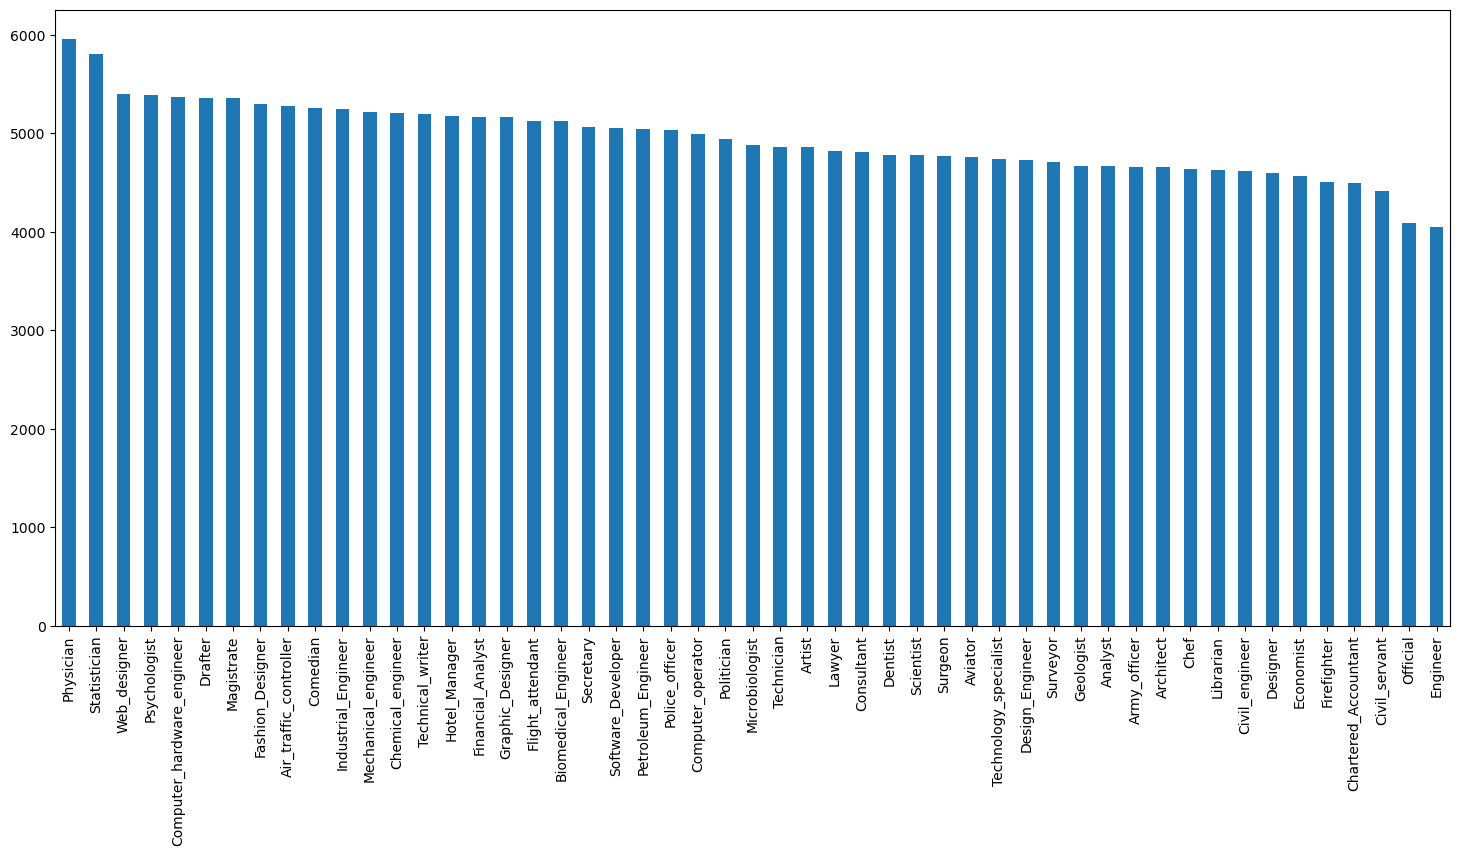

Risk_Flag,0,1,All
Profession,,,
All,221004,30996,252000
Police_officer,4209,826,5035
Software_Developer,4303,750,5053
Air_traffic_controller,4566,715,5281
Surveyor,4000,714,4714


In [110]:
plt.subplots(figsize=(18,8))
df.Profession.value_counts().plot.bar()
plt.show()

pd.crosstab(df.Profession, df.Risk_Flag, margins=True).sort_values(by=1, ascending=False).head()

#### From above we found that there **51** different types of professions
#### Physicians are the most loan takers but Pollice Officers are the most defaulters

In [111]:
print("Total no. of States=",df['STATE'].nunique())
print("Total no. of Cities=",df['CITY'].nunique())

Total no. of States= 29
Total no. of Cities= 317


In [112]:
pd.crosstab(df.STATE, df.CITY, margins=True)

CITY,Adoni,Agartala,Agra,Ahmedabad,Ahmednagar,Aizawl,Ajmer,Akola,Alappuzha,Aligarh,...,Vadodara,Varanasi,Vasai-Virar,Vellore,Vijayanagaram,Vijayawada,Visakhapatnam[4],Warangal[11][12],Yamunanagar,All
STATE,,,,,,,,,,,,,,,,,,,,,
Andhra_Pradesh,953,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1259,1172,971,0,0,25297
Assam,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7062
Bihar,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,19780
Chandigarh,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,656
Chhattisgarh,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3834
Delhi,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5490
Gujarat,0,0,0,649,0,0,0,0,0,0,...,960,0,0,0,0,0,0,0,0,11408
Haryana,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,659,7890
Himachal_Pradesh,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,833


In [113]:
pd.crosstab(df.STATE, df.Risk_Flag, margins=True).style.background_gradient(cmap="Dark2")

Risk_Flag,0,1,All
STATE,,,
Andhra_Pradesh,22362,2935,25297
Assam,6132,930,7062
Bihar,17197,2583,19780
Chandigarh,595,61,656
Chhattisgarh,3323,511,3834
Delhi,4916,574,5490
Gujarat,10065,1343,11408
Haryana,6910,980,7890
Himachal_Pradesh,722,111,833


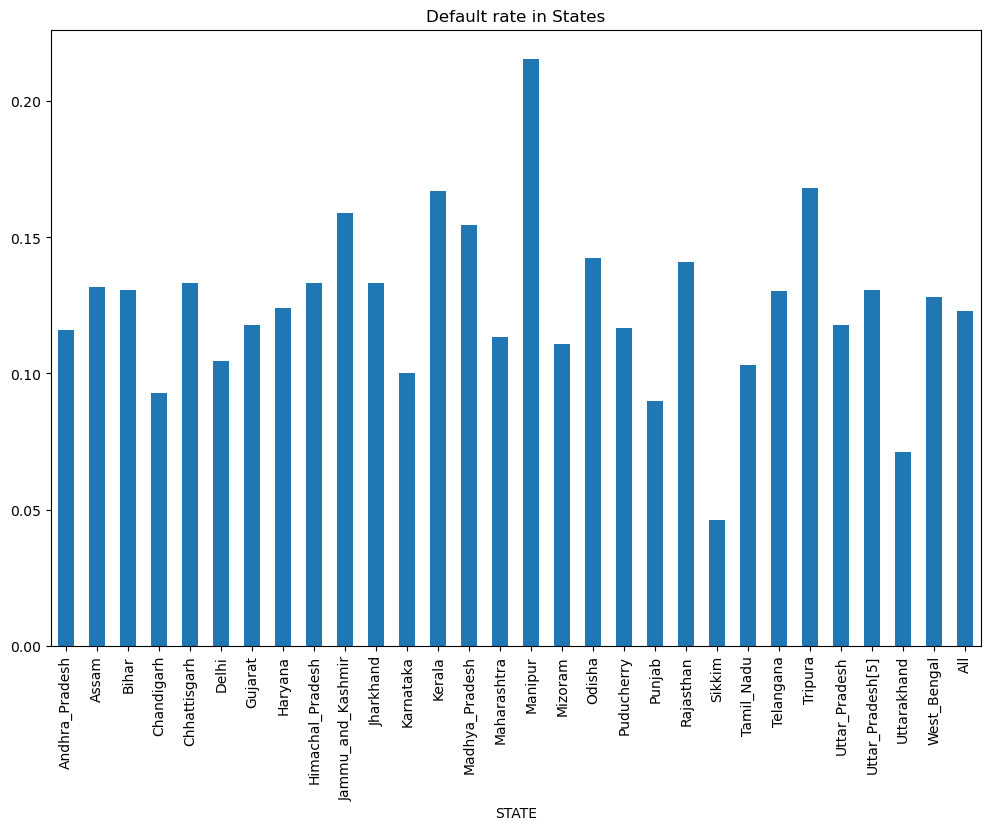

In [114]:
(pd.crosstab(df.STATE, df.Risk_Flag, margins=True)[1] / pd.crosstab(df.STATE, df.Risk_Flag, margins=True)["All"]).plot.bar().set(title="Default rate in States")
fig = plt.gcf()
fig.set_size_inches(12,8)
plt.show()

In [115]:
(pd.crosstab(df.STATE, df.Risk_Flag, margins=True)[1] / pd.crosstab(df.STATE, df.Risk_Flag, margins=True)["All"]).sort_values(ascending=False).head()

STATE
Manipur              0.215548
Tripura              0.168109
Kerala               0.167097
Jammu_and_Kashmir    0.158989
Madhya_Pradesh       0.154369
dtype: float64

In [116]:
(pd.crosstab(df.CITY, df.Risk_Flag, margins=True)[1] / pd.crosstab(df.CITY, df.Risk_Flag, margins=True)["All"]).sort_values(ascending=False).head()

CITY
Bhubaneswar    0.326194
Gwalior        0.272727
Bettiah[33]    0.266958
Kochi          0.252862
Raiganj        0.239554
dtype: float64

In [41]:
df.STATE[df.CITY == "Bhubaneswar"].value_counts()

Odisha    607
Name: STATE, dtype: int64

#### From here we can see that Manipur has 21.55% of default rate
#### Bhubaneswar is city that have 32.61% of default rate,
#### Odisha is state in which Bhubaneswar is located but only have 14% of default rate.

In [117]:
risk_data = df.loc[df["Risk_Flag"] == 1]
risk_data.head()
print(len(risk_data))

30996


In [118]:
not_risk_data = df.loc[df["Risk_Flag"] == 0][:len(risk_data)]
print(len(not_risk_data))

30996


In [119]:
loan=pd.concat([risk_data,not_risk_data])
loan = loan.sample(frac=1)
len(loan)

61992

Distribution of the risk_flag in the subsample dataset
1    0.5
0    0.5
Name: Risk_Flag, dtype: float64


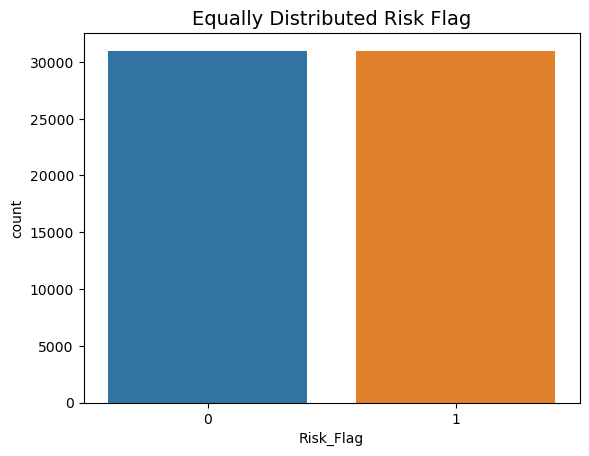

In [120]:
print("Distribution of the risk_flag in the subsample dataset")
print(loan["Risk_Flag"].value_counts() / len(loan))

sns.countplot(x="Risk_Flag", data=loan)
plt.title('Equally Distributed Risk Flag', fontsize=14);
plt.show()

In [121]:
loan=loan.drop(['CITY','CURRENT_JOB_YRS'],axis=1)

In [122]:
print(loan.shape)
print(df.shape)

(61992, 10)
(252000, 12)


In [123]:
loan=pd.get_dummies(loan,columns=['Marital_status','House_Ownership','Car_Ownership','Profession','STATE'])

In [124]:
loan.head()

,Income,Age,Experience,CURRENT_HOUSE_YRS,Risk_Flag,Marital_status_married,Marital_status_single,House_Ownership_norent_noown,House_Ownership_owned,House_Ownership_rented,...,STATE_Punjab,STATE_Rajasthan,STATE_Sikkim,STATE_Tamil_Nadu,STATE_Telangana,STATE_Tripura,STATE_Uttar_Pradesh,STATE_Uttar_Pradesh[5],STATE_Uttarakhand,STATE_West_Bengal
Id,,,,,,,,,,,,,,,,,,,,,
210500,7181774,58,20,10,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
41757,4278856,59,12,11,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
92301,340075,45,0,13,1,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2089,2874640,50,10,12,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
179514,6641682,42,0,10,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [125]:
x = loan.drop(['Risk_Flag'],axis=1)
y = loan.Risk_Flag
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [96]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a logistic regression model
logreg_model = LogisticRegression()

# Fit the model on the training data
logreg_model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = logreg_model.predict(x_test)

In [98]:
accuracy = logreg_model.score(x_test, y_test)
accuracy

0.56290999032154

In [99]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.57      0.55      0.56      9315
           1       0.56      0.58      0.57      9283

    accuracy                           0.56     18598
   macro avg       0.56      0.56      0.56     18598
weighted avg       0.56      0.56      0.56     18598



In [100]:
from sklearn import metrics  
cm= metrics.confusion_matrix(y_test,y_pred)  

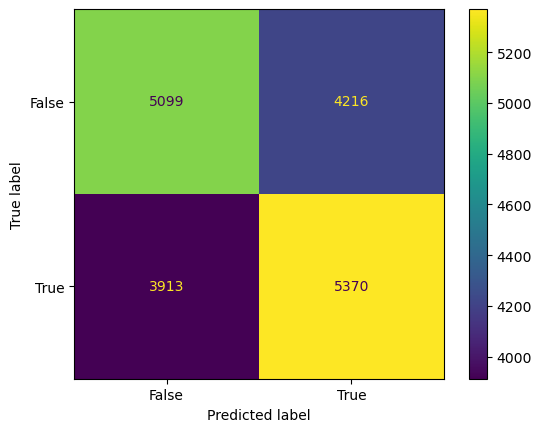

In [101]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show()

In [102]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k = 5

In [103]:
kfold = KFold(n_splits=k, shuffle=True, random_state=42)


In [104]:
accuracy_scores = cross_val_score(logreg_model,x_train,y_train, cv=kfold, scoring='accuracy')


In [105]:
accuracy_scores

array([0.54487844, 0.55421131, 0.56273764, 0.54499366, 0.55784743])

In [106]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier()
rf_classifier.fit(x_train, y_train)

y_pred = rf_classifier.predict(x_test)


In [107]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8922464781159264


In [108]:
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      9315
           1       0.92      0.86      0.89      9283

    accuracy                           0.89     18598
   macro avg       0.89      0.89      0.89     18598
weighted avg       0.89      0.89      0.89     18598



In [179]:
accuracy_scores = cross_val_score(rf_classifier,x_train,y_train, cv=kfold, scoring='accuracy')
accuracy_scores

array([0.87256596, 0.886162  , 0.87786611, 0.87844222, 0.88211569])

In [180]:
# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

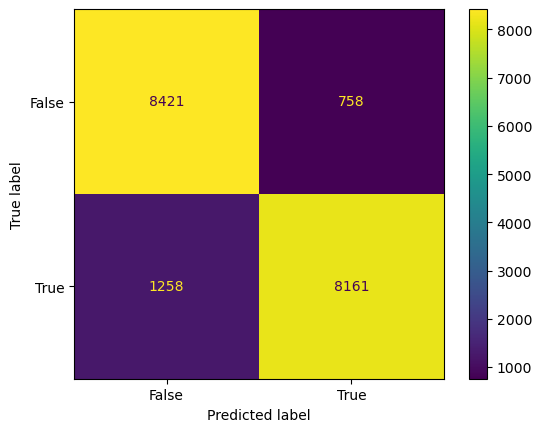

In [181]:
cm= metrics.confusion_matrix(y_test,y_pred)  
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show()